### Support Vector for SVR with categorical data

Data comes from Kaggle (polynomial regression)
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.rs

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }<style>"))

#### Import dataset

In [3]:
dataset = pd.read_csv('Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# See Linear Regression for below

# dataset['Extracurricular Activities'].value_counts()
# dataset.isna().sum()
# dataset.info()
#dataset.describe()

#### Separate X features & y labels

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
X[0], y[0]

(array([7, 99, 'Yes', 9, 1], dtype=object), 91.0)

#### Encode categorical data

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X[0], y[0]

#note we dropped one of the dummy variables, to avoid multicollinearity

(array([1.0, 7, 99, 9, 1], dtype=object), 91.0)

#### Turn y also into 2D array

In [8]:
#after 
y = y.reshape(len(y), 1)
y[0]

array([91.])

#### SPLIT into Training & Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train[0], X_test[0], y_train[0], y_test[0]

(array([0.0, 5, 95, 6, 4], dtype=object),
 array([0.0, 4, 67, 9, 3], dtype=object),
 array([83.]),
 array([53.]))

#### Feature Scaling (Standard Scaler)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

X_test = sc_X.transform(X_test)

#### TRAIN the SVR model on Training set

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

#### TEST the model

In [12]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))


In [13]:
new_df = pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten().round(1)})
new_df.sample(5)

,y_test,y_pred
968,67.0,67.6
1546,54.0,55.0
988,39.0,38.3
1046,37.0,36.0
155,27.0,29.2


#### EVALUATE the Model

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(5)
mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
rmse = np.sqrt(mse).round(5)

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1-(1-r2)*(n-1)/(n-k-1)),7)

print(f"Mean Absolute Error: {mae}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error Error: {rmse}")

print(f"R2: {r2}")
print(f"R2 adjusted: {r2_adj}")

Mean Absolute Error: 1.6726
Mean Squared Error: 4.39041
Root Mean Squared Error Error: 2.09533
R2: 0.987241
R2 adjusted: 0.9872346


<span style="text-decoration: underline;">On the Linear Regression we got:</span>
- Mean Absolute Error: 1.62215
- Mean Squared Error: 4.1012
- Root Mean Squared Error: 2.02514
- R2: 0.9880814
- R2 adjusted: 0.9880742    
    
<span style="text-decoration: underline;">On the Polynomial Regression we got:</span>
- Mean Absolute Error: 1.63185
- Mean Squared Error: 4.14462
- Root Mean Squared Error Error: 2.03583
- R2: 0.9879553
- R2 adjusted: 0.9879481

R2 squared and R2 adusted came same as Polynomial, but MAE and MSE increased slightly. Overall good model, but Linear Regresson seems to be best of all three.

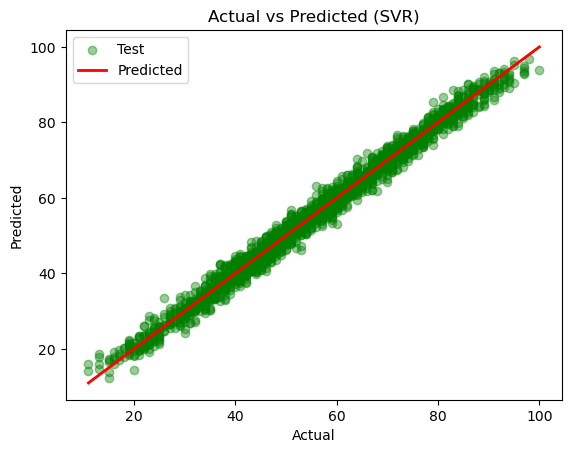

In [15]:
# Scatter plot for training data
#plt.scatter(y_train, regressor.predict(X_train), color='blue', label='Train', alpha = 0.5)
plt.scatter(y_test, y_pred, color='green', label='Test', alpha = 0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (SVR)')
plt.legend()
plt.show()

#### PREDICT

In [16]:
new_pred1 = regressor.predict(sc_X.transform([[0.0, 4.99, 69.44, 6.5, 4.6]]))
new_pred1 = sc_y.inverse_transform(new_pred1.reshape(-1, 1))

new_pred2 = regressor.predict(sc_X.transform([[1.0, 5, 80, 7, 7]]))
new_pred2 = sc_y.inverse_transform(new_pred2.reshape(-1,1))

new_pred1, new_pred2

(array([[54.4438499]]), array([[66.26841132]]))

If a student does not participare in Extracurricular Act., studies for 4.99 hours, have previously scored 69.44, slept for 6.5 hours and have practiced 4.6 sample questions, then his/hers final performance would be 54.44. 

Linear Regression was 55.53

Polynomial was 55.47

SVR gives worst grade so far

#### Lets do Grid Search

In [17]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action ='ignore', category=DataConversionWarning)
warnings.filterwarnings(action = 'ignore', category=UserWarning)


param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
             'kernel': ['linear', 'kbf', 'poly'],
             'gamma': ['scale', 'auto'],
             'degree': [2, 3, 4],
             'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

from sklearn.model_selection import GridSearchCV
svr = SVR()
grid = GridSearchCV(svr, param_grid)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\btemo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\btemo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\btemo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.p

{'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [19]:
#Ok lets try it with the provided values from GridSearch
from sklearn.svm import SVR
regressor = SVR(kernel='linear', C=0.1, degree=2, epsilon=0.1, gamma='scale') 
regressor.fit(X_train, y_train.ravel())

y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

new_df = pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten().round(1)})


mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(5)
mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
rmse = np.sqrt(mse).round(5)

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1-(1-r2)*(n-1)/(n-k-1)),7)

print(f"Mean Absolute Error: {mae}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error Error: {rmse}")

print(f"R2: {r2}")
print(f"R2 adjusted: {r2_adj}")

Mean Absolute Error: 1.62265
Mean Squared Error: 4.10467
Root Mean Squared Error Error: 2.026
R2: 0.9880714
R2 adjusted: 0.9880654


In [ ]:
# results from the prior model

# Mean Absolute Error: 1.6726
# Mean Squared Error: 4.39041
# Root Mean Squared Error Error: 2.09533
# R2: 0.987241
# R2 adjusted: 0.9872346

#it made it slightly better!